# BA890 Research Project
# Detecting Cyberbullying with Machine Learning


### Name: Yesol Lee
### BU ID: U13126115
### BU Email: yesollee@bu.edu


In [ ]:
## installs
! pip install -U spacy 
! pip install -U textacy
! pip install afinn
! pip install wordcloud

In [ ]:
# imports basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import for NLP
import re
import spacy
from spacy import cli
from spacy import displacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, RegexpTokenizer, WordPunctTokenizer, TweetTokenizer
import gensim
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")
from nltk.stem.snowball import SnowballStemmer

from wordcloud import WordCloud
from wordcloud import STOPWORDS

from afinn import Afinn

# import for machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer 
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#load the data
df = pd.read_csv('https://raw.githubusercontent.com/yesol-ba/portfolio/main/Data/cyberbullying_tweets.csv')

In [ ]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df.shape

(47692, 2)

# Descriptive Statistics

In [ ]:
avg_char = df['tweet_text'].apply(lambda x: len(str(x))).mean()
print(f'Average tweets character length: {avg_char:.0f}')

avg_word = df['tweet_text'].apply(lambda x: len(str(x).split())).mean()
print(f'Average tweet word length: {avg_word:.0f}')

del avg_char, avg_word

Average tweets character length: 136
Average tweet word length: 24


In [ ]:
df["cyberbullying_type"].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

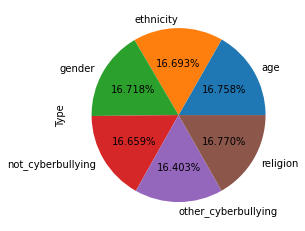

In [ ]:
df.groupby("cyberbullying_type").size().plot(kind='pie',
                                       y = "cyberbullying type",
                                       label = "Type",
                                       autopct='%1.3f%%')

# Wordclouds
## Text preprocessing for wordclouds

In [ ]:
# define stopwords
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

# define regext
re_clean = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'

In [ ]:
# define custom function to preprocess text data
def remove_punct(text):
  import string
  text = ''.join([p for p in text if p not in set(string.punctuation)])
  return text  

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

lemmatizer = WordNetLemmatizer()

def lemmatizer_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

stemmer = SnowballStemmer("english")

def stemming(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

def clean_text(text):
    text = text.lower()
    text = re.sub(re_clean, ' ', text)
    text = remove_punct(text)
    text = remove_stopwords(text)
    text = lemmatizer_words(text)
    text = stemming(text)
    return text

In [ ]:
# apply preprocessing on text data
df["tweet_preprocessed"] = df["tweet_text"].apply(clean_text)

In [ ]:
df.sample(10)

,tweet_text,cyberbullying_type,tweet_preprocessed
13319,"Paleo Pete, who does your tan? 🍊 #MKR",gender,paleo pete tan
18233,@Assiye61 I have three Qurans. And the only fe...,religion,three quran peac vers later abrog dozen violen...
4918,Oh no Disneylands going down #mkr #lambmeatballs,not_cyberbullying,oh disneyland go lambmeatbal
34973,Why can’t my parents understand that I don’t w...,age,parent understand wanna watch coron street bra...
14855,You must have done some Female ass shit if a g...,gender,must done femal as shit girl call bitch lol
24722,"I didn't die in my sleep, how fucking annoying...",other_cyberbullying,die sleep fuck annoy
1732,RT @john_rosato: #mkr heading into 2017 with a...,not_cyberbullying,john rosato head 2017 anoth instant restaur round
3952,Only the best will enter Kitchen Head Quarters...,not_cyberbullying,best will enter kitchen head quarter pete best...
26330,RT @andreajanelle9: Raise your hand if you hav...,other_cyberbullying,andreajanelle9 rais hand felt person victim th...
15175,@AnonMnom @LBigmann Source.,gender,lbigmann sourc


## Wordcloud - Gender

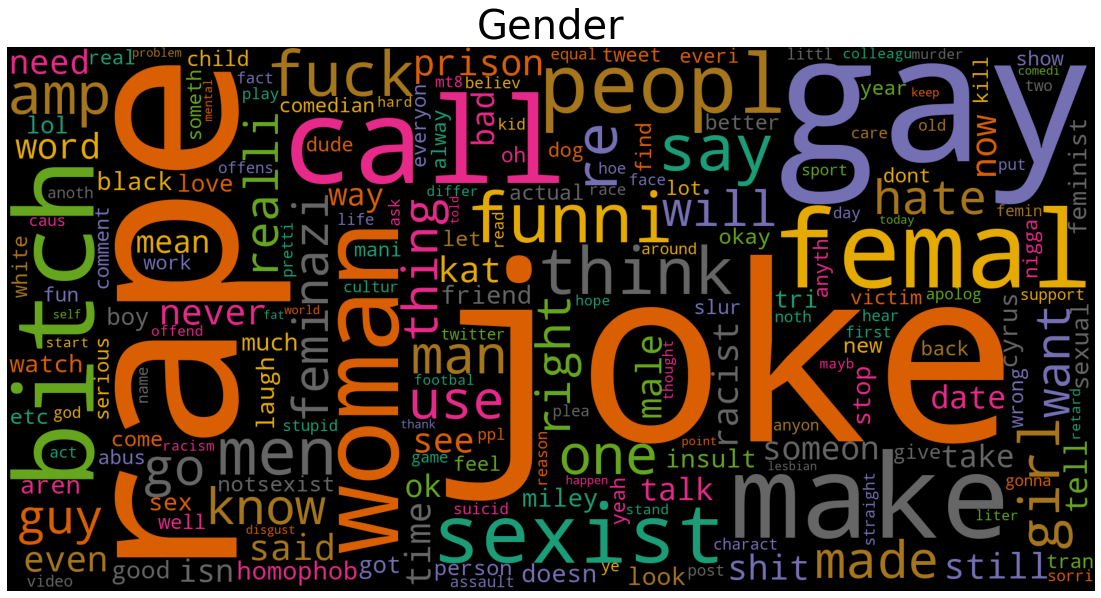

In [ ]:
# subset data
gender = df[df['cyberbullying_type']=='gender']

# draw wordcloud
plt.figure(figsize=(20,10))
text_gender = gender.tweet_preprocessed.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)

## Wordcloud - Ethinicity

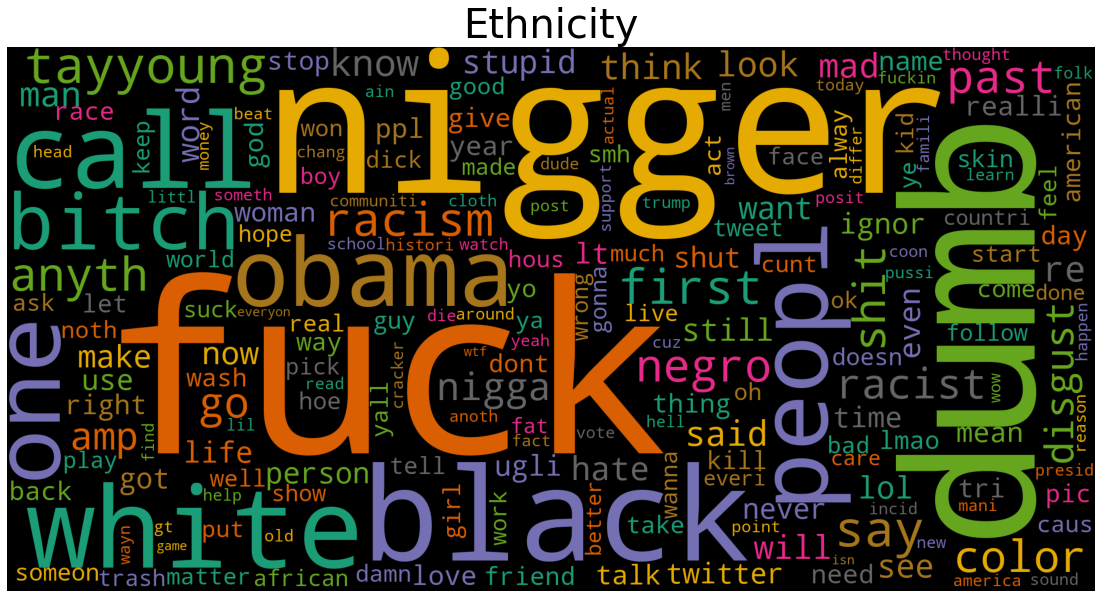

In [ ]:
# subset data
ethnicity = df[df['cyberbullying_type']=='ethnicity']

# draw wordcloud
plt.figure(figsize=(20,10))
text_ethnicity = ethnicity.tweet_preprocessed.values
cloud2=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity))

plt.axis('off')
plt.title("Ethnicity",fontsize=40)
plt.imshow(cloud2)

## Wordcloud - Age

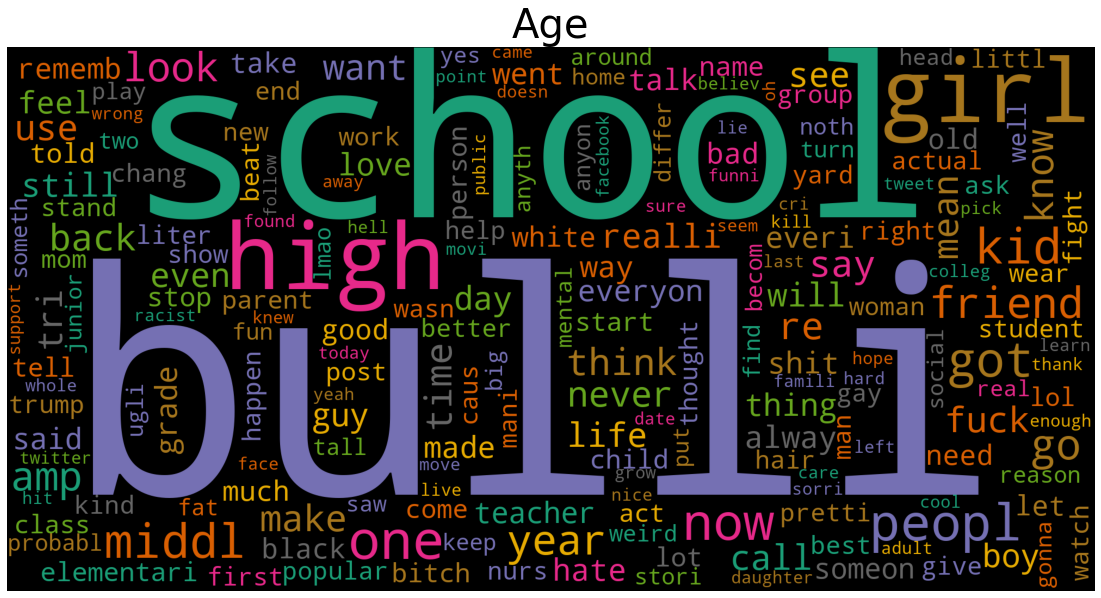

In [ ]:
# subset data
age = df[df['cyberbullying_type']=='age']

# draw wordcloud
plt.figure(figsize=(20,10))
text_age = age.tweet_preprocessed.values
cloud3=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_age))

plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud3)

## Wordcloud - Religion

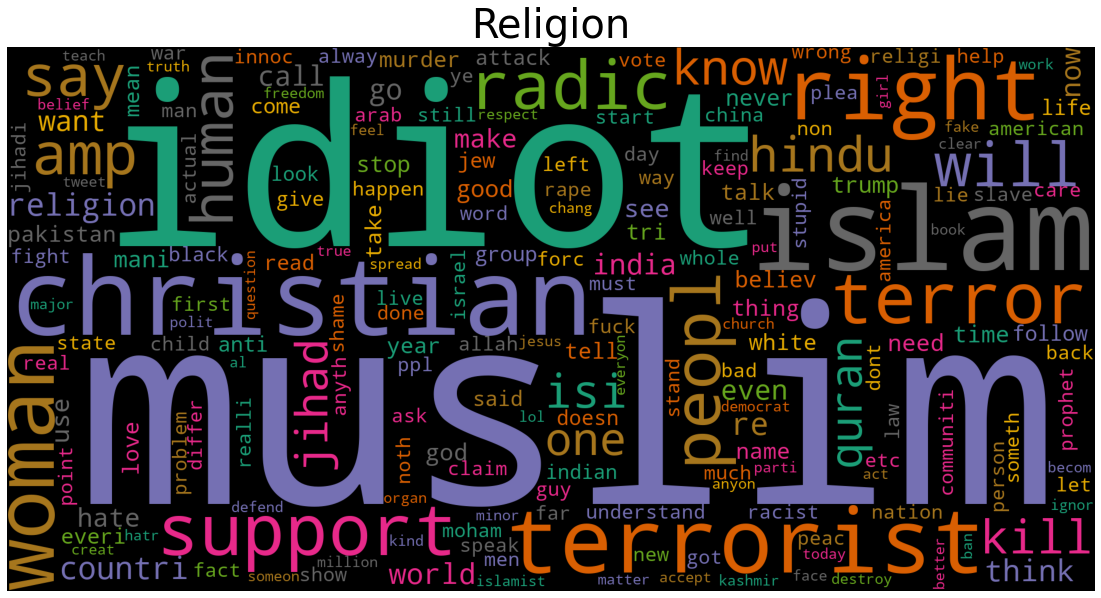

In [ ]:
# subset data
religion = df[df['cyberbullying_type']=='religion']

# draw wordcloud
plt.figure(figsize=(20,10))
text_religion = religion.tweet_preprocessed.values
cloud4=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_religion))

plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud4)

## Wordcloud - Others

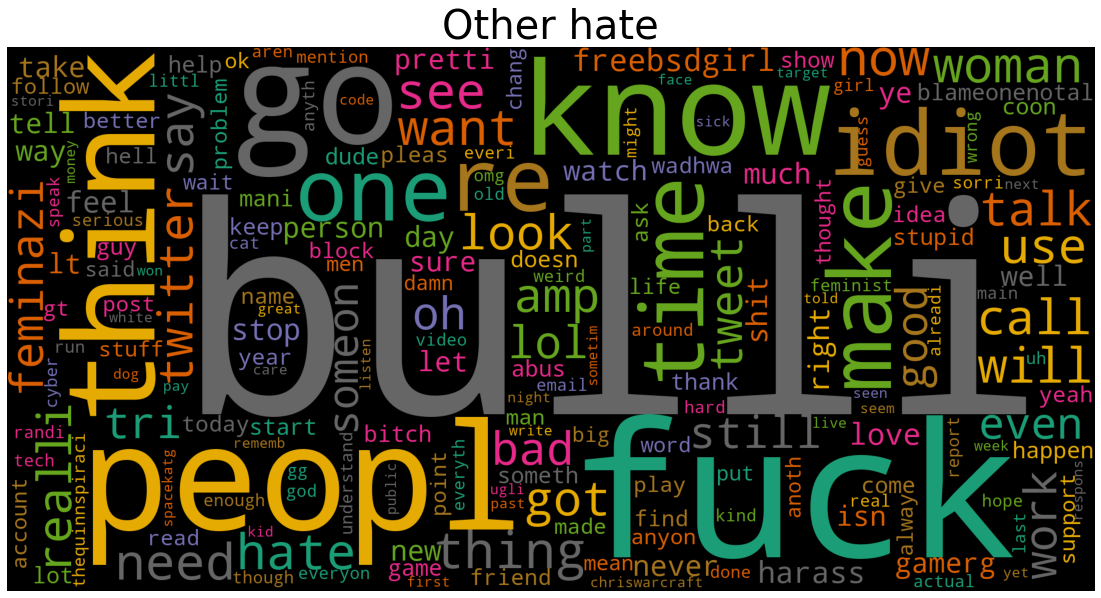

In [ ]:
# subset data
others = df[df['cyberbullying_type']=='other_cyberbullying']

# draw wordcloud
plt.figure(figsize=(20,10))
text_others = others.tweet_preprocessed.values
cloud5=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_others))

plt.axis('off')
plt.title("Other hate",fontsize=40)
plt.imshow(cloud5)

# Sentiment Analysis

In [ ]:
afinn = Afinn()

def sent_score(text):
  return afinn.score(text)

df['sent_score'] = df.tweet_preprocessed.apply(sent_score)

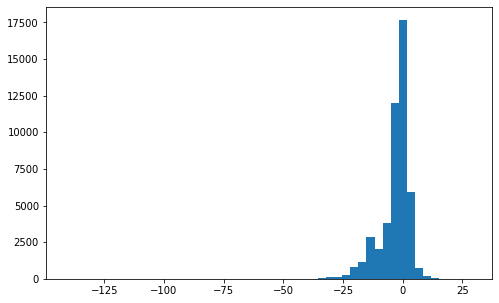

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df["sent_score"], bins=50);

In [ ]:
df["sent_score"].describe()

count    47692.000000
mean        -3.081062
std          6.154280
min       -141.000000
25%         -5.000000
50%         -1.000000
75%          0.000000
max         29.000000
Name: sent_score, dtype: float64

In [ ]:
df.groupby(by="cyberbullying_type")["sent_score"].describe()

,count,mean,std,min,25%,50%,75%,max
cyberbullying_type,,,,,,,,
age,7992.0,-0.534284,3.636716,-24.0,-2.0,0.0,1.0,23.0
ethnicity,7961.0,-10.932546,8.746563,-141.0,-16.0,-12.0,-4.0,29.0
gender,7973.0,-2.985953,4.440023,-34.0,-5.0,-2.0,0.0,20.0
not_cyberbullying,7945.0,-0.124355,2.470295,-20.0,-1.0,0.0,0.0,17.0
other_cyberbullying,7823.0,-0.739230,2.959974,-55.0,-2.0,0.0,0.0,11.0
religion,7998.0,-3.133283,4.506951,-30.0,-6.0,-3.0,0.0,21.0


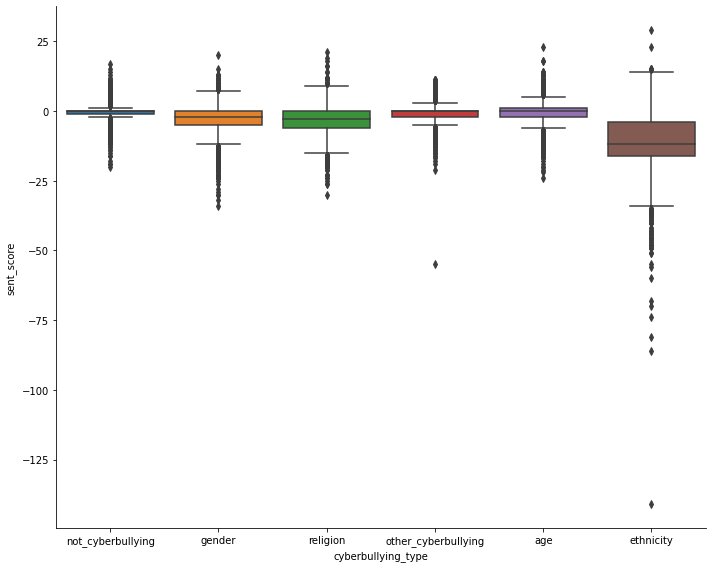

In [ ]:
sns.catplot(data=df, kind="box", x="cyberbullying_type", y="sent_score", height=8, aspect=10/8)

# Classification Model
## Data Preparation

In [ ]:
# encode cyberbullying type into numeric form
def code_target(text):
  if text == "gender":
    return 1
  elif text == "ethnicity":
    return 2
  elif text == "age":
    return 3
  elif text == "religion":
    return 4
  elif text == "other_cyberbullying":
    return 5
  else:
    return 0

df["type_number"] = df["cyberbullying_type"].apply(code_target)
df.head()

,tweet_text,cyberbullying_type,tweet_preprocessed,sent_score,type_number
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandr food crapilici,0.0,0
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white theblock imacelebrityau today s...,0.0,0
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcak,-4.0,0
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh p thank head concern anoth angri dude twitter,2.0,0
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account islam lie,-1.0,0


In [ ]:
# prepare X and y
X = df["tweet_preprocessed"]
y = df["type_number"]

In [ ]:
# train-test split
X_train, X_test, \
y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 890)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33384,) (14308,) (33384,) (14308,)


In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([5664, 5562, 5546, 5611, 5547, 5454]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([2281, 2411, 2415, 2381, 2451, 2369]))

## Spacy vector + decision tree

In [ ]:
# use spacy cli
MODEL = "en_core_web_md"

# https://spacy.io/models/en
cli.download(MODEL)

# nlp = language model
nlp = spacy.load(MODEL)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
#nlp vec

train_vec = []

for text in X_train:
  train_vec.append(nlp(text).vector)

In [ ]:
#nlp vec

test_vec = []

for text in X_test:
  test_vec.append(nlp(text).vector)

In [ ]:
print(len(train_vec), len(test_vec))

33384 14308


In [ ]:
len(train_vec[0])

300

In [ ]:
dclf = DecisionTreeClassifier(max_depth=6, min_samples_split=23, min_samples_leaf=7, random_state=890)
dclf.fit(train_vec, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, min_samples_split=23,
                       random_state=890)

In [ ]:
pred_dt = dclf.predict(test_vec)

In [ ]:
pred_proba_dt = dclf.predict_proba(test_vec)

In [ ]:
np.unique(pred_dt, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([2610, 2466, 2334, 2467, 2398, 2033]))

In [ ]:
# Evaluate the Model
acc_score = accuracy_score(y_test, pred_dt)
print("The accuracy score of the model is", round(acc_score*100,2),"%")

The accuracy score of the model is 54.96 %


In [ ]:
roc = roc_auc_score(y_test, pred_proba_dt, multi_class='ovr', average='weighted')
print("The ROC score of the model is", round(roc*100, 2),"%")

The ROC score of the model is 83.86 %


In [ ]:
target_names = ['not_cyberbullying', 'gender', 'ethnicity', 'age', 'religion', 'other_cyberbullying']

In [ ]:
print(classification_report(y_test, pred_dt, target_names=target_names, digits=4))

                     precision    recall  f1-score   support

  not_cyberbullying     0.2996    0.3428    0.3198      2281
             gender     0.5422    0.5545    0.5483      2411
          ethnicity     0.6380    0.6166    0.6271      2415
                age     0.7410    0.7677    0.7541      2381
           religion     0.6827    0.6679    0.6752      2451
other_cyberbullying     0.3891    0.3339    0.3594      2369

           accuracy                         0.5496     14308
          macro avg     0.5487    0.5472    0.5473     14308
       weighted avg     0.5515    0.5496    0.5499     14308



## Spacy vector + Random Forest

In [ ]:
rf_clf1 = RandomForestClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=7,
                                 n_estimators = 200, max_features = "sqrt", random_state=890)
rf_clf1.fit(train_vec, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=7,
                       n_estimators=200, random_state=890)

In [ ]:
pred_2 = rf_clf1.predict(test_vec)
pred_proba_2 = rf_clf1.predict_proba(test_vec)

In [ ]:
np.unique(pred_2, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1792, 2591, 2144, 2719, 2680, 2382]))

In [ ]:
# Evaluate the Model
acc_score = accuracy_score(y_test, pred_2)
print("The accuracy score of the model is", round(acc_score*100,2),"%")

The accuracy score of the model is 68.28 %


In [ ]:
roc = roc_auc_score(y_test, pred_proba_2, multi_class='ovr', average='weighted')
print("The ROC score of the model is", round(roc*100, 2),"%")

The ROC score of the model is 91.68 %


In [ ]:
print(classification_report(y_test, pred_2, target_names=target_names, digits=4))

                     precision    recall  f1-score   support

  not_cyberbullying     0.4743    0.3726    0.4174      2281
             gender     0.6642    0.7138    0.6881      2411
          ethnicity     0.8176    0.7259    0.7690      2415
                age     0.8235    0.9404    0.8780      2381
           religion     0.8019    0.8768    0.8377      2451
other_cyberbullying     0.4442    0.4466    0.4454      2369

           accuracy                         0.6828     14308
          macro avg     0.6709    0.6793    0.6726     14308
       weighted avg     0.6735    0.6828    0.6756     14308



## Spacy vector + Gaussian Naive Bayes 

In [ ]:
nb1 = GaussianNB()
nb1.fit(train_vec, y_train)

GaussianNB()

In [ ]:
pred_3 = nb1.predict(test_vec)
pred_proba_3 = nb1.predict_proba(test_vec)

In [ ]:
np.unique(pred_3, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1668, 3157, 2250, 2803, 2603, 1827]))

In [ ]:
# Evaluate the Model
acc_score = accuracy_score(y_test, pred_3)
print("The accuracy score of the model is", round(acc_score*100,2),"%")

The accuracy score of the model is 64.91 %


In [ ]:
roc = roc_auc_score(y_test, pred_proba_3, multi_class='ovr', average='weighted')
print("The ROC score of the model is", round(roc*100, 2),"%")

The ROC score of the model is 90.21 %


In [ ]:
print(classification_report(y_test, pred_3, target_names=target_names, digits=4))

                     precision    recall  f1-score   support

  not_cyberbullying     0.4616    0.3376    0.3900      2281
             gender     0.5258    0.6885    0.5963      2411
          ethnicity     0.7884    0.7346    0.7606      2415
                age     0.7724    0.9093    0.8353      2381
           religion     0.7960    0.8454    0.8199      2451
other_cyberbullying     0.4636    0.3575    0.4037      2369

           accuracy                         0.6491     14308
          macro avg     0.6346    0.6455    0.6343     14308
       weighted avg     0.6369    0.6491    0.6373     14308



## TF-IDF + Decision Tree

In [ ]:
vectorizer = TfidfVectorizer()

X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [ ]:
print(X_train_tf.shape, X_test_tf.shape)

(33384, 31572) (14308, 31572)


In [ ]:
dclf2 = DecisionTreeClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=7, random_state=890)
dclf2.fit(X_train_tf, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=7, random_state=890)

In [ ]:
pred_4 = dclf2.predict(X_test_tf)
pred_proba_4 = dclf2.predict_proba(X_test_tf)

In [ ]:
np.unique(pred_4, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 120, 1164, 1658, 2244, 2168, 6954]))

In [ ]:
# Evaluate the Model
acc_score = accuracy_score(y_test, pred_4)
print("The accuracy score of the model is", round(acc_score*100,2),"%")

The accuracy score of the model is 66.63 %


In [ ]:
roc = roc_auc_score(y_test, pred_proba_4, multi_class='ovr', average='weighted')
print("The ROC score of the model is", round(roc*100, 2),"%")

The ROC score of the model is 88.88 %


In [ ]:
print(classification_report(y_test, pred_4, target_names=target_names, digits=4))

                     precision    recall  f1-score   support

  not_cyberbullying     0.6750    0.0355    0.0675      2281
             gender     0.9991    0.4824    0.6506      2411
          ethnicity     0.9885    0.6787    0.8048      2415
                age     0.9902    0.9332    0.9609      2381
           religion     0.9608    0.8499    0.9019      2451
other_cyberbullying     0.3374    0.9903    0.5033      2369

           accuracy                         0.6663     14308
          macro avg     0.8252    0.6617    0.6482     14308
       weighted avg     0.8280    0.6663    0.6540     14308



## TF-IDF + Random Forest

In [ ]:
rf_clf2 = RandomForestClassifier(max_depth=6, min_samples_split=2, min_samples_leaf=7,
                                 n_estimators = 200, max_features = "sqrt", random_state=890)
rf_clf2.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=7,
                       n_estimators=200, random_state=890)

In [ ]:
pred_5 = rf_clf2.predict(X_test_tf)
pred_proba_5 = rf_clf2.predict_proba(X_test_tf)

In [ ]:
np.unique(pred_5, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([4659, 1870, 2532, 2614, 2435,  198]))

In [ ]:
# Evaluate the Model
acc_score = accuracy_score(y_test, pred_5)
print("The accuracy score of the model is", round(acc_score*100,2),"%")

The accuracy score of the model is 74.6 %


In [ ]:
roc = roc_auc_score(y_test, pred_proba_5, multi_class='ovr', average='weighted')
print("The ROC score of the model is", round(roc*100, 2),"%")

The ROC score of the model is 95.35 %


In [ ]:
print(classification_report(y_test, pred_5, target_names=target_names, digits=4))

                     precision    recall  f1-score   support

  not_cyberbullying     0.4164    0.8505    0.5591      2281
             gender     0.9299    0.7213    0.8124      2411
          ethnicity     0.8803    0.9230    0.9012      2415
                age     0.8982    0.9861    0.9401      2381
           religion     0.9380    0.9319    0.9349      2451
other_cyberbullying     0.6768    0.0566    0.1044      2369

           accuracy                         0.7460     14308
          macro avg     0.7899    0.7449    0.7087     14308
       weighted avg     0.7939    0.7460    0.7120     14308



## TF-IDF + Gaussian Naive Bayes

In [ ]:
nb2 = MultinomialNB()
nb2.fit(X_train_tf, y_train)

MultinomialNB()

In [ ]:
pred_6 = nb2.predict(X_test_tf.toarray())
pred_proba_6 = nb2.predict_proba(X_test_tf)

In [ ]:
np.unique(pred_6, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([1258, 2391, 2614, 3539, 3002, 1504]))

In [ ]:
# Evaluate the Model
acc_score = accuracy_score(y_test, pred_6)
print("The accuracy score of the model is", round(acc_score*100,2),"%")

The accuracy score of the model is 74.22 %


In [ ]:
roc = roc_auc_score(y_test, pred_proba_6, multi_class='ovr', average='weighted')
print("The ROC score of the model is", round(roc*100, 2),"%")

The ROC score of the model is 95.73 %


In [ ]:
print(classification_report(y_test, pred_6, target_names=target_names, digits=4))

                     precision    recall  f1-score   support

  not_cyberbullying     0.6510    0.3591    0.4628      2281
             gender     0.8164    0.8096    0.8130      2411
          ethnicity     0.8332    0.9019    0.8662      2415
                age     0.6618    0.9836    0.7912      2381
           religion     0.7928    0.9710    0.8729      2451
other_cyberbullying     0.6303    0.4002    0.4895      2369

           accuracy                         0.7422     14308
          macro avg     0.7309    0.7376    0.7159     14308
       weighted avg     0.7323    0.7422    0.7192     14308



## Hyperparametor Tuning

In [ ]:
params = [{'min_samples_split': [2, 5, 10],
         'max_depth': [6, 10, 15, 20],
         'n_estimators': [100, 200, 500],
         'min_samples_leaf' : [1, 5, 7]}]

scoring = {'AUC':'roc_auc_ovr_weighted', 'Accuracy':'accuracy', 'F1': 'f1_weighted'}

In [ ]:
rf_gridsearch = RandomForestClassifier(random_state=890)

In [ ]:
gsearch = GridSearchCV(estimator = rf_gridsearch, param_grid=params, scoring=scoring,
                       verbose=2, n_jobs=-1, refit='Accuracy', cv=2)
gsearch.fit(X_train_tf, y_train)
gsearch.best_params_, gsearch.best_score_

Fitting 2 folds for each of 108 candidates, totalling 216 fits


({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 500},
 0.7750119817876828)

In [ ]:
rf_tuned = RandomForestClassifier(random_state=890, max_depth=20, min_samples_leaf=1,
                                  min_samples_split=5, n_estimators=500)
rf_tuned.fit(X_train_tf, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=500,
                       random_state=890)

In [ ]:
pred_tuned = rf_tuned.predict(X_test_tf)
pred_proba_tuned = rf_tuned.predict_proba(X_test_tf)

In [ ]:
np.unique(pred_tuned, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([3933, 1933, 2536, 2646, 2582,  678]))

In [ ]:
# Evaluate the Model
acc_score = accuracy_score(y_test, pred_tuned)
print("The accuracy score of the model is", round(acc_score*100,2),"%")

The accuracy score of the model is 77.27 %


In [ ]:
roc = roc_auc_score(y_test, pred_proba_tuned, multi_class='ovr', average='weighted')
print("The ROC score of the model is", round(roc*100, 2),"%")

The ROC score of the model is 95.85 %


In [ ]:
print(classification_report(y_test, pred_tuned, target_names=target_names, digits=4))

                     precision    recall  f1-score   support

  not_cyberbullying     0.4554    0.7852    0.5764      2281
             gender     0.9260    0.7424    0.8241      2411
          ethnicity     0.9369    0.9839    0.9598      2415
                age     0.8881    0.9870    0.9350      2381
           religion     0.9121    0.9608    0.9358      2451
other_cyberbullying     0.5811    0.1663    0.2586      2369

           accuracy                         0.7727     14308
          macro avg     0.7833    0.7709    0.7483     14308
       weighted avg     0.7870    0.7727    0.7515     14308



In [ ]:
# Creating a confusion matrix for a multi-class
cm = confusion_matrix(y_test, pred_tuned)
cm_df = pd.DataFrame(cm,
                     index = ['not_cyberbullying','gender','ethnicity', 'age', 'religion', 'other_cyberbullying'], 
                     columns = ['not_cyberbullying','gender','ethnicity', 'age', 'religion', 'other_cyberbullying'])

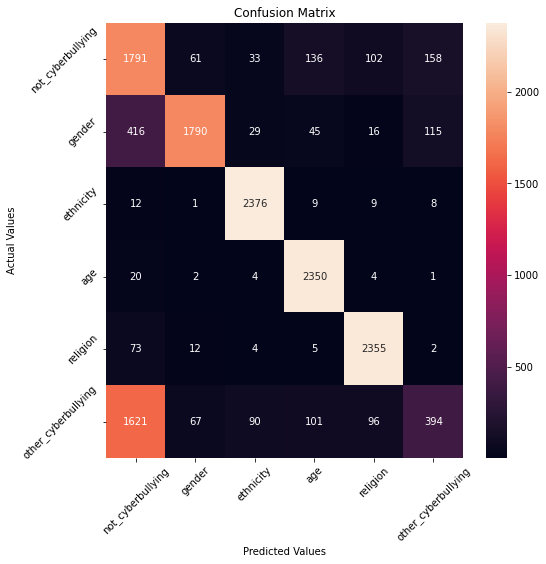

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()